In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shant\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data=pd.read_csv('loan-train.csv')
test_data=pd.read_csv('loan-test.csv')

In [3]:
print("Train Data info:")
print(train_data.info())
print("Test data info:")
print(test_data.info())

train_data.head()

Train Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Da

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)

In [5]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)

In [6]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

train_data['LoanAmount_log']=np.log(train_data['LoanAmount']+1)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount']+1)

train_data['Total_Income_log']=np.log(train_data['Total_Income']+1)
test_data['Total_Income_log']=np.log(test_data['Total_Income']+1)

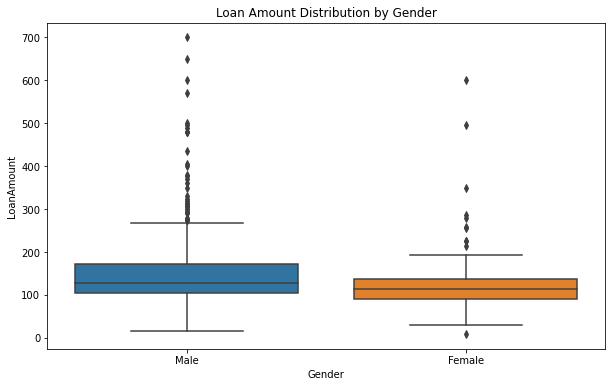

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='LoanAmount', data=train_data)
plt.title('Loan Amount Distribution by Gender')
plt.show()

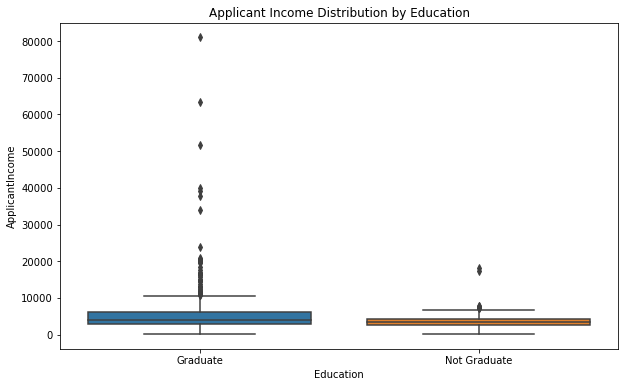

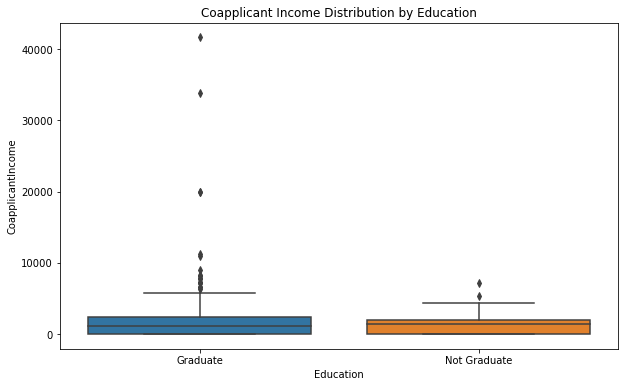

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=train_data)
plt.title('Applicant Income Distribution by Education')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='CoapplicantIncome', data=train_data)
plt.title('Coapplicant Income Distribution by Education')
plt.show()

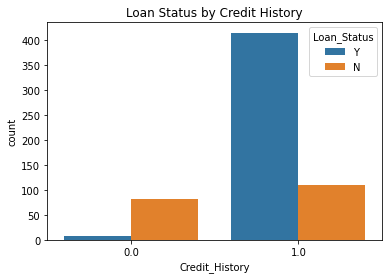

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title('Loan Status by Credit History')
plt.show()

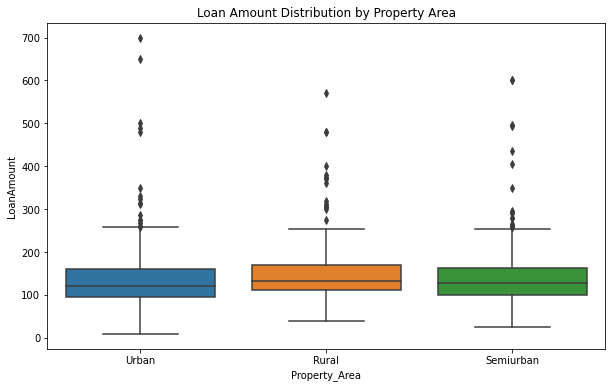

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=train_data)
plt.title('Loan Amount Distribution by Property Area')
plt.show()

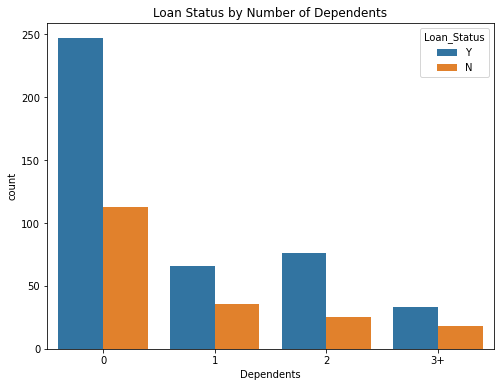

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=train_data)
plt.title('Loan Status by Number of Dependents')
plt.show()

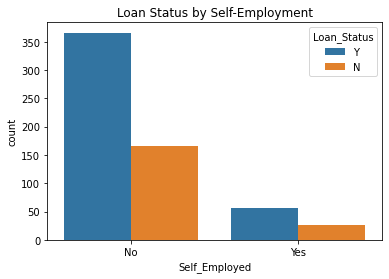

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_data)
plt.title('Loan Status by Self-Employment')
plt.show()

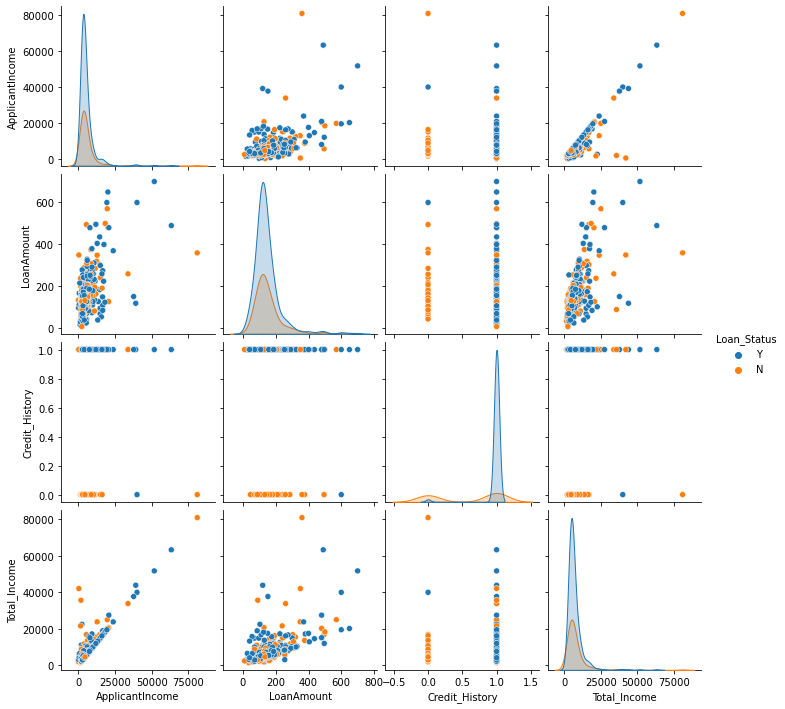

In [13]:
sns.pairplot(train_data[['ApplicantIncome', 'LoanAmount', 'Credit_History', 'Total_Income', 'Loan_Status']], hue='Loan_Status')
plt.show()

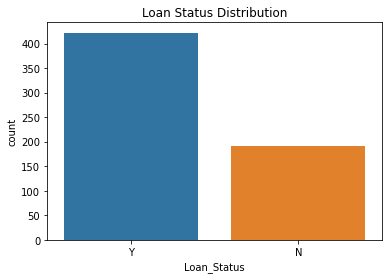

In [14]:
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Loan Status Distribution')
plt.show()

C:\Users\shant\AppData\Local\Temp\ipykernel_29044\2188015751.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


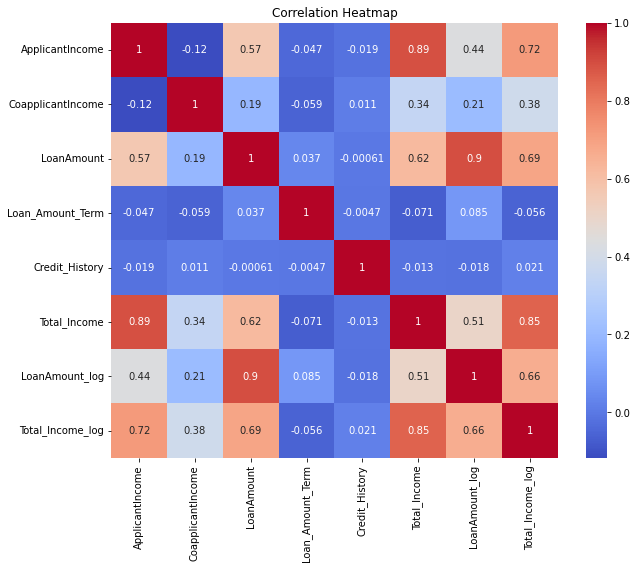

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']>train_data['ApplicantIncome'].quantile(0.99), train_data['ApplicantIncome'].quantile(0.99), train_data['ApplicantIncome'])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X=train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y=train_data['Loan_Status']

X=pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Parameter before Hyperparameter tuning:
Logistic Regression Accuracy: 0.7886
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.8166
Parameter after Hyperparameter tuning:
Logistic Regression Accuracy after tuning: 0.7886
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



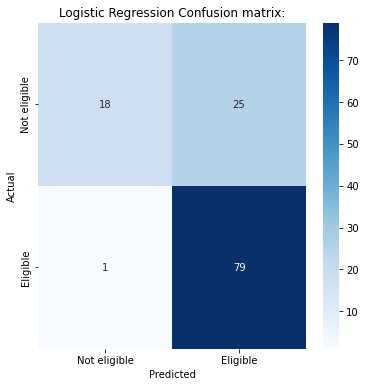

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Parameter before Hyperparameter tuning:")
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log=log_model.predict(X_test)

accuracy_log=accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(classification_report(y_test, y_pred_log))

param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

best_log_model=grid_search.best_estimator_
best_log_model.fit(X_train, y_train)

y_pred_best_log=best_log_model.predict(X_test)

print("Parameter after Hyperparameter tuning:")
accuracy_best_log=accuracy_score(y_test, y_pred_best_log)
print(f"Logistic Regression Accuracy after tuning: {accuracy_best_log:.4f}")
print(classification_report(y_test, y_pred_best_log))

cm_log=confusion_matrix(y_test, y_pred_best_log)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Not eligible', 'Eligible'], yticklabels=['Not eligible', 'Eligible'])
plt.title('Logistic Regression Confusion matrix:')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print("Counts of actual classes in y_test:")
print(pd.Series(y_test).value_counts())

print("Counts of predicted classes in y_pred_log:")
print(pd.Series(y_pred_log).value_counts())

Counts of actual classes in y_test:
Y    80
N    43
Name: Loan_Status, dtype: int64
Counts of predicted classes in y_pred_log:
Y    104
N     19
dtype: int64


Parameters before Hyperparameter Tuning:
Decision Tree Accuracy: 0.7073
              precision    recall  f1-score   support

           N       0.58      0.58      0.58        43
           Y       0.78      0.78      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.71      0.71      0.71       123

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validated accuracy: 0.8064
Parameters after Hyperparameter Tuning:
Decision Tree Accuracy after tuning: 0.7480
              precision    recall  f1-score   support

           N       0.80      0.37      0.51        43
           Y       0.74      0.95      0.83        80

    accuracy                           0.75       123
   macro avg       0.77      0.66      0.67       123
weighted avg       0.76      0.75      0.72       123



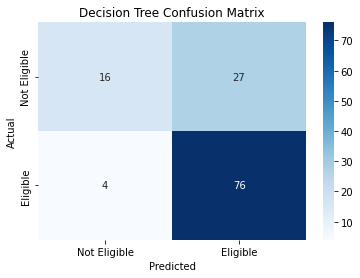

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)

print("Parameters before Hyperparameter Tuning:")
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

param_grid={
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

best_dt_model=grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)
y_pred_best_dt = best_dt_model.predict(X_test)

print("Parameters after Hyperparameter Tuning:")
accuracy_best_dt=accuracy_score(y_test, y_pred_best_dt)
print(f"Decision Tree Accuracy after tuning: {accuracy_best_dt:.4f}")
print(classification_report(y_test, y_pred_best_dt))


cm_dt=confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Parameters before HyperParamter tuning:
Random Forest Classifier:0.780488
              precision    recall  f1-score   support

           N       0.83      0.47      0.60        43
           Y       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 0.8146
Parameters after Hyperparameter tuning:
Random Forest Accuracy after tuning: 0.7967
              precision    recall  f1-score   support

           N       0.91      0.47      0.62        43
           Y       0.77      0.97      0.86        80

    accuracy                           0.80       123
   macro avg       0.84      0.72      0.74       123
weighted avg     

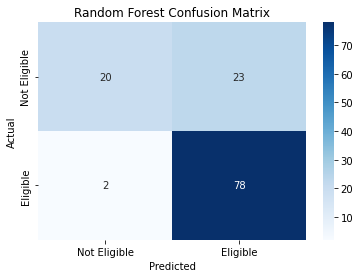

In [21]:
from sklearn.ensemble import RandomForestClassifier

print("Parameters before HyperParamter tuning:")
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

accuracy_rf=accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier:{accuracy_rf:4f}")
print(classification_report(y_test, y_pred_rf))

param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

best_rf_model=grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf=best_rf_model.predict(X_test)

print("Parameters after Hyperparameter tuning:")
accuracy_best_rf=accuracy_score(y_test, y_pred_best_rf)
print(f"Random Forest Accuracy after tuning: {accuracy_best_rf:.4f}")
print(classification_report(y_test, y_pred_best_rf))

cm_rf=confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Parameters before Hyperparameter tuning:
SVM Accuracy: 0.7967
              precision    recall  f1-score   support

           N       1.00      0.42      0.59        43
           Y       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shant\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\shant\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.py

Best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validated accuracy: 0.8187
Parameters after Hyperparameter tuning:
SVM Accuracy after tuning: 0.7886
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



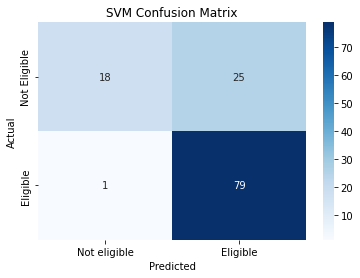

In [22]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model.fit(X_train, y_train)
y_pred_svm=svm_model.predict(X_test)

print("Parameters before Hyperparameter tuning:")
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

param_grid={
    'C':[0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'kernel'],
    'class_weight': [None, 'balanced']
}

grid_search=GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

best_svm_model=grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_best_svm=best_svm_model.predict(X_test)

print("Parameters after Hyperparameter tuning:")
accuracy_best_svm=accuracy_score(y_test, y_pred_best_svm)
print(f"SVM Accuracy after tuning: {accuracy_best_svm:.4f}")
print(classification_report(y_test, y_pred_best_svm))

cm_svm=confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Parameters before Hyperparameter tuning:
KNN Accuracy: 0.7480
              precision    recall  f1-score   support

           N       0.77      0.40      0.52        43
           Y       0.74      0.94      0.83        80

    accuracy                           0.75       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.75      0.75      0.72       123

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validated accuracy: 0.7922
Parameters After Hyperparameter tuning:
KNN Accuracy after tuning: 0.7317
              precision    recall  f1-score   support

           N       0.69      0.42      0.52        43
           Y       0.74      0.90      0.81        80

    accuracy                           0.73       123
   macro avg       0.72      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



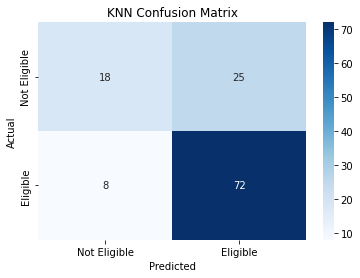

In [23]:
from sklearn.neighbors import KNeighborsClassifier

print("Parameters before Hyperparameter tuning:")
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn=knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

best_knn_model=grid_search.best_estimator_
y_pred_best_knn=best_knn_model.predict(X_test)

print("Parameters After Hyperparameter tuning:")
accuracy_best_knn=accuracy_score(y_test, y_pred_best_knn)
print(f"KNN Accuracy after tuning: {accuracy_best_knn:.4f}")
print(classification_report(y_test, y_pred_best_knn))

cm_knn=confusion_matrix(y_test, y_pred_best_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

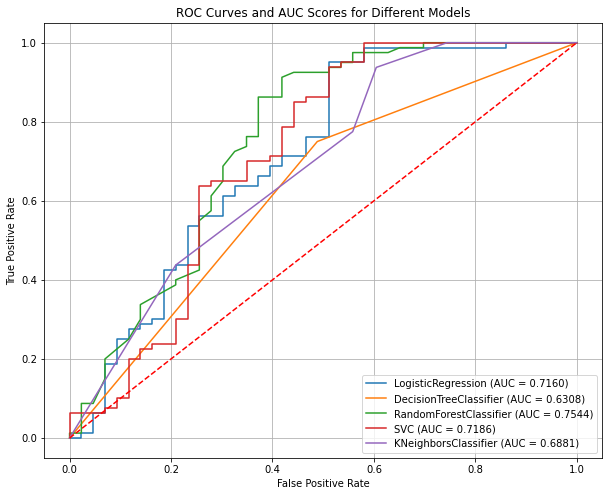

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

y_val_binary=y_test.replace({'Y': 1, 'N': 0})

def plot_roc_auc_curve(model, X_val, y_val_binary):
    y_proba = model.predict_proba(X_val)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_val_binary, y_proba)
    auc_score = roc_auc_score(y_val_binary, y_proba)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.4f})')

plt.figure(figsize=(10, 8))

log_model=LogisticRegression()
log_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(log_model, X_test, y_val_binary)

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(dt_model, X_test, y_val_binary)

rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(rf_model, X_test, y_val_binary)

svm_model=SVC(probability=True)
svm_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(svm_model, X_test, y_val_binary)

knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(knn_model, X_test, y_val_binary)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curves and AUC Scores for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

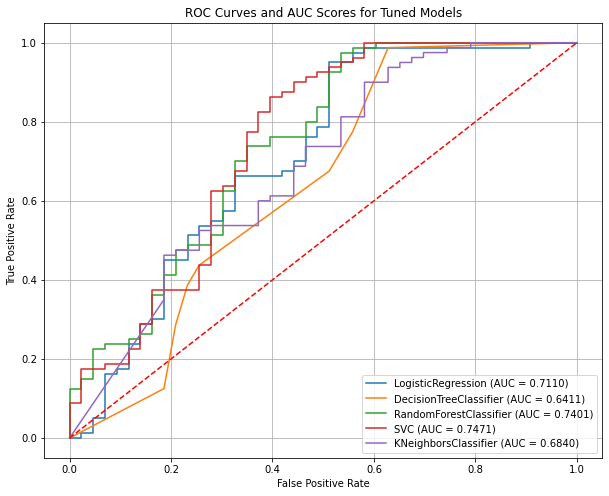

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc_curve(model, X_test, y_test_binary):
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
    auc_score = roc_auc_score(y_test_binary, y_proba)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.4f})')

y_test_binary = y_test.replace({'Y': 1, 'N': 0})

plt.figure(figsize=(10, 8))

log_model_tuned=LogisticRegression(C=10, solver='lbfgs')
log_model_tuned.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(log_model_tuned, X_test, y_test_binary)

dt_model_tuned=DecisionTreeClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=2, criterion='entropy')
dt_model_tuned.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(dt_model_tuned, X_test, y_test_binary)

rf_model_tuned=RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_model_tuned.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(rf_model_tuned, X_test, y_test_binary)

svm_model_tuned=SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
svm_model_tuned.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(svm_model_tuned, X_test, y_test_binary)

knn_model_tuned=KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn_model_tuned.fit(X_train, y_train.replace({'Y': 1, 'N': 0}))
plot_roc_auc_curve(knn_model_tuned, X_test, y_test_binary)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curves and AUC Scores for Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [26]:
print("Accuracies before Hyperparameter tuning are:")

accuracies={}

accuracies['Logistic Regression']=accuracy_log
accuracies['Decision Tree']=accuracy_dt
accuracies['Random Forest']=accuracy_rf
accuracies['SVM']=accuracy_svm
accuracies['KNN']=accuracy_knn

for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")
    
print(f"Best model before tuning is:{max(accuracies, key=accuracies.get)} with an accuracy of {accuracies[max(accuracies, key=accuracies.get)]:.4f}")
    
print("Accuracies After Hyperparameter tuning are:")

accuracies_tuned={}

accuracies_tuned['Logistic Regression']=accuracy_best_log
accuracies_tuned['Decision Tree']=accuracy_best_dt
accuracies_tuned['Random Forest']=accuracy_best_rf
accuracies_tuned['SVM']=accuracy_best_svm
accuracies_tuned['KNN']=accuracy_best_knn

for model_name, accuracy in accuracies_tuned.items():
    print(f"{model_name}: {accuracy:.4f}")
    
print(f"Best model before tuning is:{max(accuracies_tuned, key=accuracies_tuned.get)} with an accuracy of {accuracies_tuned[max(accuracies_tuned, key=accuracies_tuned.get)]:.4f}")

Accuracies before Hyperparameter tuning are:
Logistic Regression: 0.7886
Decision Tree: 0.7073
Random Forest: 0.7805
SVM: 0.7967
KNN: 0.7480
Best model before tuning is:SVM with an accuracy of 0.7967
Accuracies After Hyperparameter tuning are:
Logistic Regression: 0.7886
Decision Tree: 0.7480
Random Forest: 0.7967
SVM: 0.7886
KNN: 0.7317
Best model before tuning is:Random Forest with an accuracy of 0.7967
